# 2d mixture of 25 Gaussians generation experiment

This notebook is a part of a [Github project](https://github.com/palette-knife25/wgan-ddls). It can not be executed without ``utils``, ``wgan_fully_connected_models`` and ``wgan_train`` scripts.

In [1]:
import numpy as np
import sklearn.datasets
import time
import random
import os
import glob

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import torch, torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torch import autograd

from utils import prepare_25gaussian_data, prepare_train_batches
from utils import prepare_train_batches, sample_fake_data
from wgan_fully_connected_models import Generator_fully_connected, Discriminator_fully_connected, 
                                         weights_init_1, weights_init_2
from wgan_train import train_wgan
from ebm_sampling import new_langevin_sampling

/opt/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


## WGAN Training

In [15]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_dataset_size = 100000
BATCH_SIZE = 256            
X_train = prepare_25gaussian_data(train_dataset_size)
X_train_batches = prepare_train_batches(X_train, BATCH_SIZE) 
path_to_save="./"

In this experiment we are going to train Wasserstein GAN (WGAN). It targets Kantorovich-Wasserstein distance, so its objectives are:

$$L_D = \mathbb{E}_{p_g}\left[D(x)\right] - \mathbb{E}_{p_d}\left[D(x)\right]$$
$$L_G = -\mathbb{E}_{p_0}\left[D\left(G(x)\right)\right]$$


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = Generator_fully_connected(n_dim = 2).to(device)
D = Discriminator_fully_connected().to(device)
G.apply(weights_init_2)
D.apply(weights_init_2)

Discriminator_fully_connected(
  (non_linear): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [8]:
lr_init = 1e-4
d_optimizer = torch.optim.Adam(D.parameters(), betas = (0.5, 0.9), lr = lr_init)
g_optimizer = torch.optim.Adam(G.parameters(), betas = (0.5, 0.9), lr = lr_init)
use_gradient_penalty = True
Lambda = 0.1
num_epochs = 20000
num_epoch_for_print = 500
num_epoch_for_save = 500
batch_size_sample = 5000   

In [6]:
print("Start to train WGAN")
train_wgan(X_train,
           X_train_batches, 
           G, g_optimizer, 
           D, d_optimizer,
           path_to_save,
           BATCH_SIZE,
           device,
           use_gradient_penalty,
           Lambda,
           num_epochs,
           num_epoch_for_print,
           num_epoch_for_save,
           batch_size_sample)

Start to train WGAN
Start epoch = 0
Epoch 1 of 20000 took 0.732s
Discriminator last mean loss: 	-4.047354
Generator last mean loss: 	0.267520
Start epoch = 500
Epoch 501 of 20000 took 0.071s
Discriminator last mean loss: 	-0.338993
Generator last mean loss: 	0.508288
Start epoch = 1000
Epoch 1001 of 20000 took 0.072s
Discriminator last mean loss: 	-0.274069
Generator last mean loss: 	-0.279738
Start epoch = 1500
Epoch 1501 of 20000 took 0.072s
Discriminator last mean loss: 	-0.271398
Generator last mean loss: 	-0.350093
Start epoch = 2000
Epoch 2001 of 20000 took 0.071s
Discriminator last mean loss: 	-0.239141
Generator last mean loss: 	-0.213929
Start epoch = 2500
Epoch 2501 of 20000 took 0.072s
Discriminator last mean loss: 	-0.228768
Generator last mean loss: 	-0.077688
Start epoch = 3000
Epoch 3001 of 20000 took 0.073s
Discriminator last mean loss: 	-0.201530
Generator last mean loss: 	-0.026587
Start epoch = 3500
Epoch 3501 of 20000 took 0.071s
Discriminator last mean loss: 	-0.18

/notebook/stat_project/utils.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (20, 5))
/notebook/stat_project/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


Start epoch = 10500
Epoch 10501 of 20000 took 0.072s
Discriminator last mean loss: 	-0.088588
Generator last mean loss: 	0.156767
Start epoch = 11000
Epoch 11001 of 20000 took 0.072s
Discriminator last mean loss: 	-0.097351
Generator last mean loss: 	0.124888
Start epoch = 11500
Epoch 11501 of 20000 took 0.073s
Discriminator last mean loss: 	-0.098506
Generator last mean loss: 	0.123809
Start epoch = 12000
Epoch 12001 of 20000 took 0.072s
Discriminator last mean loss: 	-0.059526
Generator last mean loss: 	0.022186
Start epoch = 12500
Epoch 12501 of 20000 took 0.073s
Discriminator last mean loss: 	-0.064482
Generator last mean loss: 	-0.060707
Start epoch = 13000
Epoch 13001 of 20000 took 0.073s
Discriminator last mean loss: 	-0.072018
Generator last mean loss: 	-0.058195
Start epoch = 13500
Epoch 13501 of 20000 took 0.073s
Discriminator last mean loss: 	-0.074542
Generator last mean loss: 	0.019193
Start epoch = 14000
Epoch 14001 of 20000 took 0.074s
Discriminator last mean loss: 	-0.0

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

Here I visualize the training process

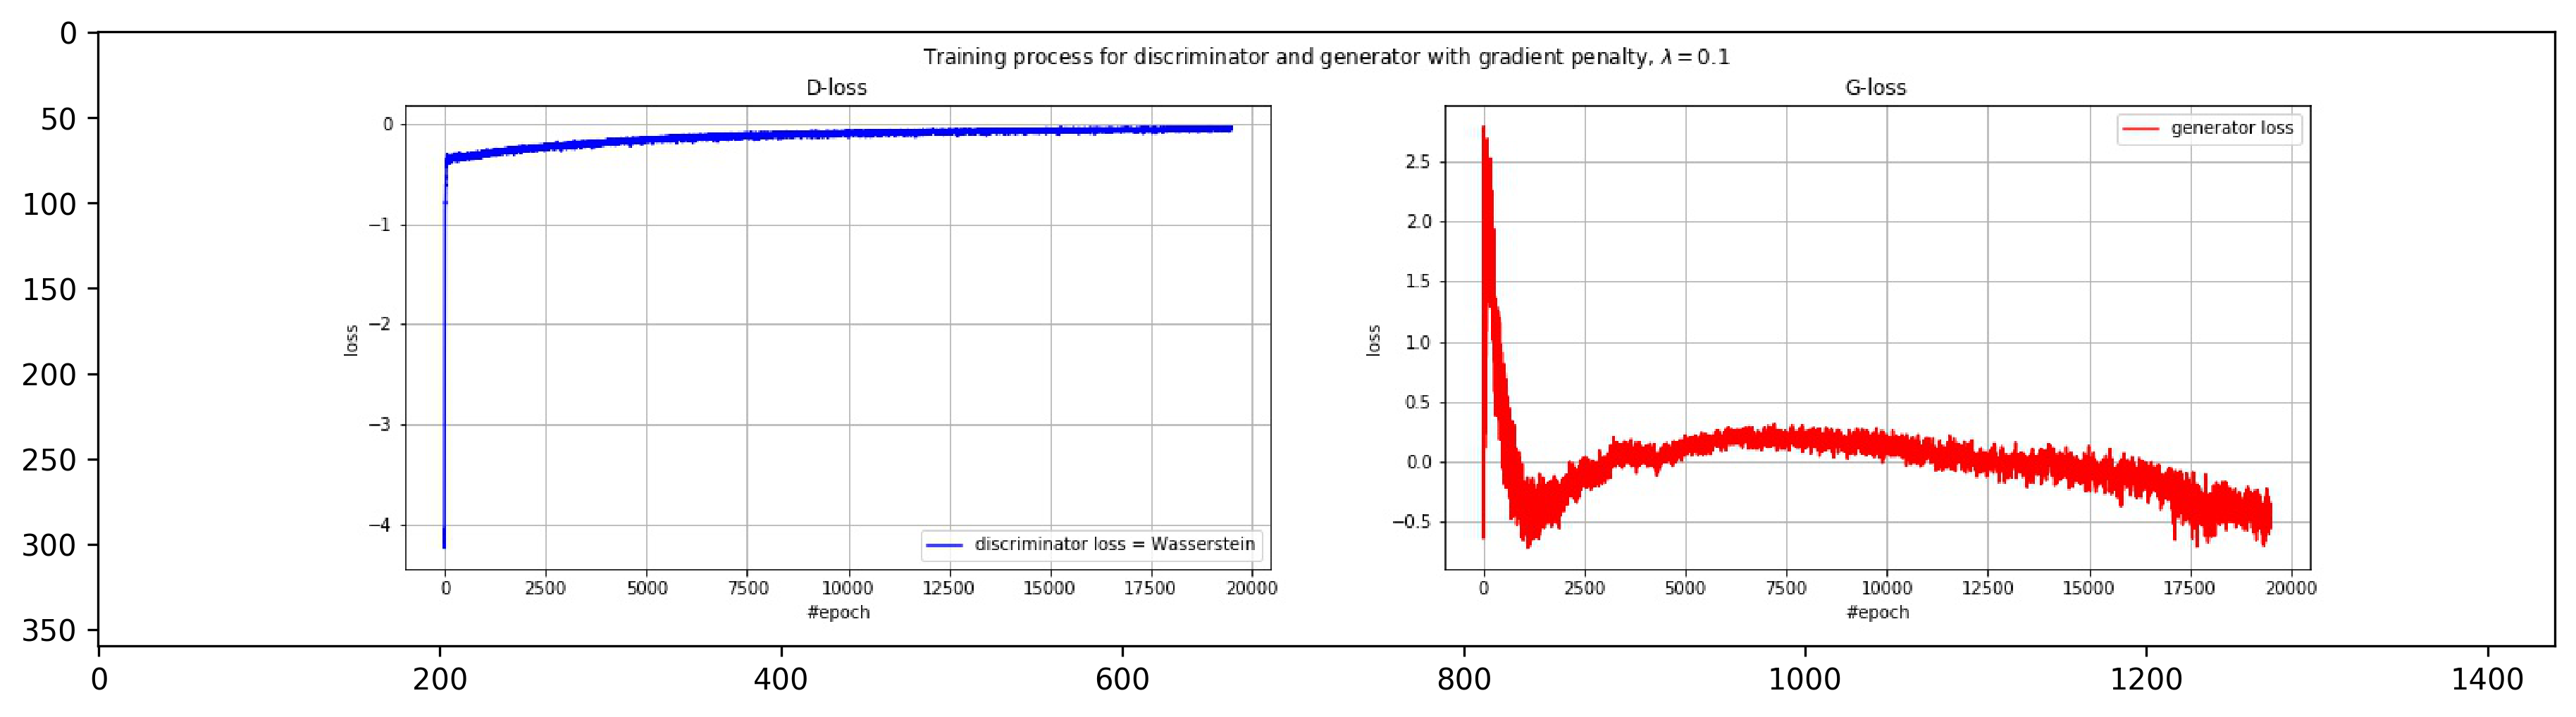

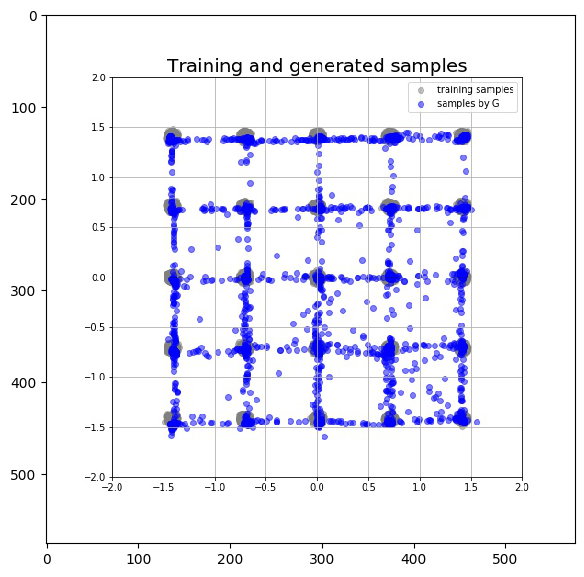

In [8]:
losses_regexp = os.path.join('./plots', "*_losses_*.jpg")
losses_list = [f for f in glob.glob(losses_regexp)]
losses_list.sort()
img = mpimg.imread(losses_list[-1])
plt.figure(figsize=(15,5), dpi=300)
imgplot = plt.imshow(img)
plt.show()

sampling_regexp = os.path.join('./plots', "*_sampling_*.jpg")
sampling_list = [f for f in glob.glob(sampling_regexp)]
sampling_list.sort()
img = mpimg.imread(sampling_list[-1])
plt.figure(figsize=(7,7), dpi=100)
imgplot = plt.imshow(img)
plt.show()

## DDLS

In [2]:
def plot_fake_data(fake_data, X_train, eps, epoch, path_to_save, sampling_mode = 'Langevin'):
    plt.figure(figsize=(8, 8))
    plt.xlim(-2., 2.)
    plt.ylim(-2., 2.)
    title = fr"Training data and {sampling_mode}"
    plt.title(title, fontsize=20)
    plt.scatter(X_train[:,:1], X_train[:,1:], alpha=0.5, color='gray', 
                marker='o', label = 'training samples')
    plt.scatter(fake_data[:,:1], fake_data[:,1:], alpha=0.5, color='blue', 
                marker='o', label = 'samples by G')
    plt.legend()
    plt.grid(True)
    if path_to_save is not None:
        cur_time = datetime.datetime.now().strftime('%Y_%m_%d-%H_%M_%S')
        plot_name = cur_time + f'_wgan_sampling_{epoch}_epoch.jpg'
        path_to_plot = os.path.join(path_to_save, plot_name)
        plt.savefig(path_to_plot)
    else:
        plt.show()

In [36]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

from scipy.stats import wasserstein_distance

def sliced_wasserstein(X, Y, num_proj):
    # Earth Mover's distanse score
    dim = X.shape[1]
    ests = []
    for _ in range(num_proj):
        dirr = np.random.rand(dim)
        dirr /= np.linalg.norm(dirr)

        # project the data
        X_proj = X @ dirr
        Y_proj = Y @ dirr

        # compute 1d wasserstein
        ests.append(wasserstein_distance(X_proj, Y_proj))
    return np.mean(ests)

In [9]:
z_dim = 2
G = Generator_fully_connected(n_dim = 2).to(device)
D = Discriminator_fully_connected().to(device)

In [10]:
print("Load models")

discriminator_regexp = os.path.join('./models', "*_discriminator.pth")
discriminator_names_list = [f for f in glob.glob(discriminator_regexp)]
discriminator_names_list.sort()
path_to_25_gaussian_discriminator = discriminator_names_list[-1]

generator_regexp = os.path.join('./models', "*_generator.pth")
generator_names_list = [f for f in glob.glob(generator_regexp)]
generator_names_list.sort()
path_to_25_gaussian_generator = generator_names_list[-1]

Load models


In [11]:
G.load_state_dict(torch.load(path_to_25_gaussian_generator))
D.load_state_dict(torch.load(path_to_25_gaussian_discriminator))

<All keys matched successfully>

In [12]:
for p in D.parameters():  
    p.requires_grad = False
for p in G.parameters():  
    p.requires_grad = False

In [13]:
batch_size_sample = 1000

### Generating from vanilla Generator

Start to sample from simple generator


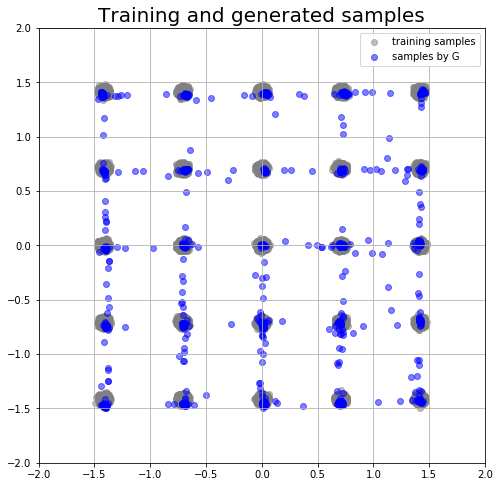

Earth Mover’s Distance: 0.04408277384275758


In [42]:
title = f"Training and generated samples, num samples = {batch_size_sample}"
mode = f"downloaded_25_gaussians"

fake_data = G.sampling(batch_size_sample).data.cpu().numpy()
path_to_save_plots = os.path.join(path_to_save, 'plots')

print("Start to sample from simple generator")
epoch=19500
sample_fake_data(G, X_train, epoch, None, batch_size_sample)
score = sliced_wasserstein(X_train,fake_data,2)
print(f"Earth Mover’s Distance: {score}")

### Generating with Langevin's sampling

Sampling is performed according to the algorithm:

$\textbf{Input}:  N \in \mathbb{N}_{+}, \ \varepsilon > 0$

$\textbf{Output}: \text{Latent code } z_N \sim p_t(z)$

$\text{Sample } z_0 \sim p_0(z)$

$\textbf{while } i < N \textbf{ do}$

$n_i \sim \mathcal{N}(0,1)$

$z_{i+1} = z_i - \left.\dfrac{\varepsilon}{2} \nabla_z E(z)\right|_{z_i} + \sqrt{\varepsilon}n_i$

$i=i+1$

$\textbf{end}$

We initialize ``batch_size_sample`` variables and improve them for ``num_iter`` iterations.

In [ ]:
from torch.distributions import MultivariateNormal, Normal, Independent, Uniform
from tqdm import tqdm

def new_langevin_sampling(generator, discriminator, z_dim, eps, num_iter, batch_size_sample, device):
    cur_z_arr = []
    for i in range(0, batch_size_sample):
        loc = torch.zeros(z_dim).to(device)
        scale = torch.ones(z_dim).to(device)
        normal = Normal(loc, scale)
        diagn = Independent(normal, 1)
        cur_z = diagn.sample()
        cur_z_arr.append(cur_z.clone())
    cur_z_arr = (torch.stack(cur_z_arr, dim = 0))
    cur_z_arr.requires_grad_(True)
    latent_arr = [cur_z_arr.clone()]

    for i in tqdm(range(num_iter - 1)):
        GAN_part = -discriminator(generator(cur_z_arr))
        latent_part = -diagn.log_prob(cur_z_arr)
        for j in range(batch_size_sample):
            energy = GAN_part[j] + latent_part[j]
            energy.backward(retain_graph = True)
            with torch.no_grad():
                noise = diagn.sample()
                cur_z_arr[j] -= (0.5*eps*(cur_z_arr.grad)[j] - (eps ** 0.5)*noise)
        latent_arr.append(cur_z_arr.clone())
    return latent_arr

Start to sample from Langevin dynamics
Langevin dynamics with eps = 0.01


100%|██████████| 99/99 [01:38<00:00,  1.01it/s]


Time calculation = 98.44 seconds
Earth Mover’s Distance: 0.24396403207697048


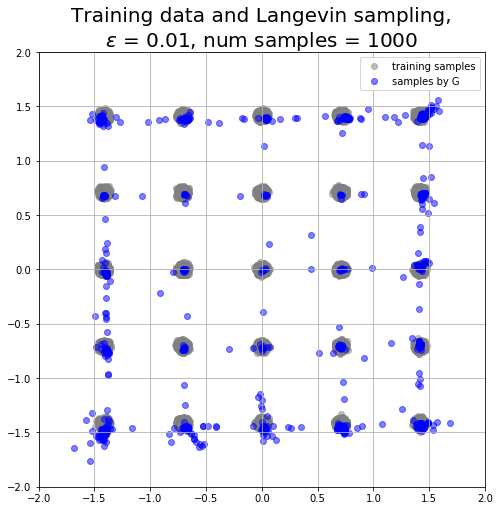

Langevin dynamics with eps = 0.001


100%|██████████| 99/99 [01:39<00:00,  1.01s/it]


Time calculation = 99.75 seconds
Earth Mover’s Distance: 0.07591813458720605


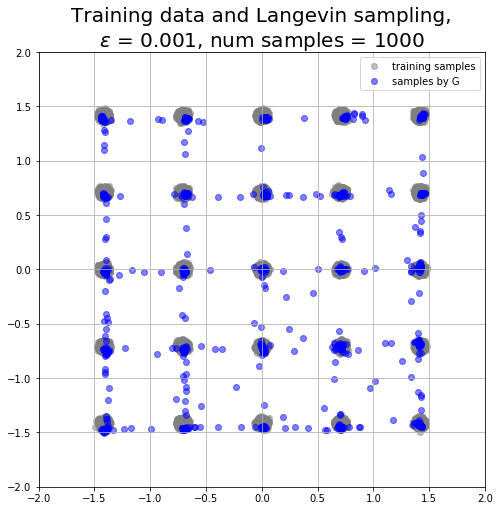

Langevin dynamics with eps = 0.0001


100%|██████████| 99/99 [01:40<00:00,  1.01s/it]


Time calculation = 100.39 seconds
Earth Mover’s Distance: 0.06467951416113572


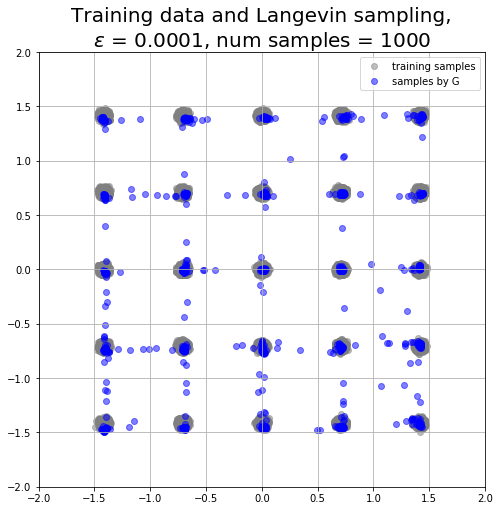

Langevin dynamics with eps = 1e-05


100%|██████████| 99/99 [01:39<00:00,  1.00s/it]


Time calculation = 99.75 seconds
Earth Mover’s Distance: 0.03502410294304269


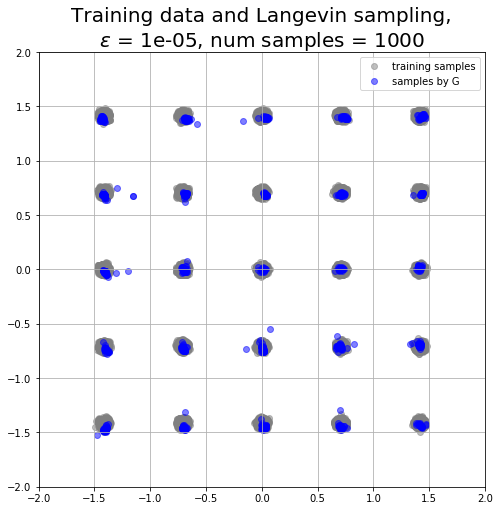

In [37]:
print("Start to sample from Langevin dynamics")

num_iter=100
eps_arr = [1e-2, 1e-3, 1e-4, 1e-5]
for i in range(len(eps_arr)):
    cur_eps = eps_arr[i]
    print(f"Langevin dynamics with eps = {cur_eps}")
    start_time = time.time()
    latent_arr = new_langevin_sampling(G, D, z_dim, cur_eps, num_iter, batch_size_sample, device)[-1]
    end_time = time.time()
    calc_time = end_time - start_time
    print(f"Time calculation = {round(calc_time, 2)} seconds")
    fake_data = G(latent_arr).data.cpu().numpy()
    score = sliced_wasserstein(X_train,fake_data,2)
    
    print(f"Earth Mover’s Distance: {score}")
    
    mode = f"Langevin sampling,\n$\\varepsilon$ = {cur_eps}, num samples = {batch_size_sample}"
    plot_fake_data(fake_data, X_train, cur_eps, epoch, path_to_save=None, sampling_mode=mode)

We observe clear improvement from the vanilla Generator both quantitatively and qualitatively.

What was done:

- Trained WGAN (training code was copied from [repo](https://github.com/Daniil-Selikhanovych/ebm-wgan))
- Wrote our own Langevin Sampling, performed experiments
- Evaluated results